<div style="width: 100%; overflow: hidden;">
    <div style="width: 500px; float: left;"> 
        <h1>Data Analysis with Python</h1> <br>
        <b>Winter Semester 2018/2019</b><br>
        <b>Lukas Arnold and Max Böhler</b>
    </div>
    <div style="float:right;"> 
        <img src="images/fzj_logo.png" style="width:150px;"/>
        <img src="images/buw_logo.png" style="width:150px;"/>
    </div>
</div>

_NumPy_ is the fundamental package for scientific computing with Python when it comes to large, multidimensional arrays (vectors) and matrices.  
<br>
In addition to the fast computation of _NumPy_ arrays (way more faster than Python Lists), the main benefit lies in the included mathematical operations like shape manipulation, sorting, selecting, I/O, basic linear algebra, basic statistical operations, random simulation and so on.
One should hold in mind that _NumPy_ arrays are not as flexible as Python Lists. While the latter one could store different data types in one list, each _NumPy_ array only stores values of the same data type!

Examples and more detailed instructions how to use _numpy_ can be found here:
http://www.numpy.org/
<br>
<br>
_Note: If numpy is not yet installed on your system, open the Anaconda prompt (or terminal on Unix systems) and type:_

`conda install numpy`


In [5]:
# This small Script shows how fast a NumPy Array in comparison to a Python List is.
# Execute this script by pushing Shift+Enter

import time
import numpy as np
import sys

size_of_vec = 1000

def pure_python_version():
    t1 = time.time()
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    return time.time() - t1, Z

def numpy_version():
    t1 = time.time()
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = X + Y
    return time.time() - t1, Z


t1,py_list = pure_python_version()
t2,np_array = numpy_version()

list_mem = sys.getsizeof(py_list)/1000
array_mem = sys.getsizeof(np_array)/1000

print("Computational time for Python List: {} s and the object (memory) size: {} kB".format(t1,list_mem))
print("Computational time for Numpy Array: {} s and the object (memory) size: {} kB".format(t2,array_mem))

print("\nTherefore the numpy array is {:.4f} times faster!".format(t1/t2))


Computational time for Python List: 0.00025391578674316406 s and the object (memory) size: 9.024 kB
Computational time for Numpy Array: 5.1021575927734375e-05 s and the object (memory) size: 8.096 kB

Therefore the numpy array is 4.9766 times faster!


### Array/Matrix indexing

Single element indexing for a 1-D works exactly like indexing for Python-Lists. It is 0-based, and accepts negative indices for indexing from the end of the array.

In [21]:
# Example

# Different routines for the creation of NumPy 1-D arrays:
array_1 = np.array([1.0, 2.0, 3.0]) # Simple 1D array 
array_2 = np.zeros(10) # Create an array with 10 elements with value 0
array_3 = np.arange(10,20.0,0.3) # Create an array from 0 to 19
array_4 = np.linspace(0,20,11) # Creates a evenly spaced array from 0 to 20 with 11 elements

#print(array_1[-1]) # Print the last element of array_1
#print(array_3) # Print all elements of array_3
print(array_4>10) # Print all elements of array_4 which are bigger than 10

[False False False False False False  True  True  True  True  True]


2-D array indexing works in a similar way.

In [22]:
# Example

array_2D = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) # create a 2D array (= 2x3 matrix)

print(array_2D[1,2]) # print element in row 1 column 2

6


It is also possible to slice (accessing more than one element) numpy arrays.

In [30]:
# Example

# Create a more complex Matrix

# First initalize Matrix
x = np.zeros(shape=(10,10)) # create a 10x10 zero-matrix

print(x.shape)
# Get the shape (number of rows/columns)
rows = x.shape[0]
columns = x.shape[1]

counter = 1

# Loop through each row/column
for i in range(0,rows):
    for j in range(0,columns):
        x[i,j] = counter
        counter = counter + 1

#Array Slicing
#print(x[0,:]) # Print the first row of matrix x (using : as symbol for all elements in this row)
print(x[0,:5]) # Print the first row starting from column 5
#print(x[:,3]) # Print all elements of column 3

print(x)

(10, 10)
[1. 2. 3. 4. 5.]
[[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [ 11.  12.  13.  14.  15.  16.  17.  18.  19.  20.]
 [ 21.  22.  23.  24.  25.  26.  27.  28.  29.  30.]
 [ 31.  32.  33.  34.  35.  36.  37.  38.  39.  40.]
 [ 41.  42.  43.  44.  45.  46.  47.  48.  49.  50.]
 [ 51.  52.  53.  54.  55.  56.  57.  58.  59.  60.]
 [ 61.  62.  63.  64.  65.  66.  67.  68.  69.  70.]
 [ 71.  72.  73.  74.  75.  76.  77.  78.  79.  80.]
 [ 81.  82.  83.  84.  85.  86.  87.  88.  89.  90.]
 [ 91.  92.  93.  94.  95.  96.  97.  98.  99. 100.]]


### numpy.loadtxt
The NumPy routine _loadtxt_ is a convenient way to load data from a ASCII formatted file into a numpy array.
In combination with _matplotlib_ and array slicing it is also a fast way to plot data.

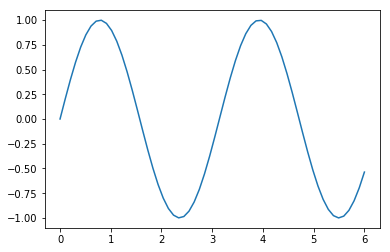

In [32]:
# example
# For this example, it is necassary to download the 'simple_data.csv' file from moodle!

data = np.loadtxt("simple_data.csv", delimiter=',')
#print(data)

x_values = data[:,0] # Column 0 contains all x-values
y_values = data[:,1] # Column 1 contains all y-values

import matplotlib.pyplot as plt

plt.plot(x_values, y_values)
plt.show()

### <font color="green"> _Task 1: Load and manipulate data from a .csv file_ </font>

1. Use NumPy's .loadtxt() routine to access the data stored in bitmap_data.csv and store it in a numpy array
1. Get the shape of this array as seen above
1. Loop through each row and column and check if each element is bigger or smaller than 150
    - if the element is bigger or equal 150 set the element value to 1
    - if the element is smaller than 150 set the value to 0
<br>
<br>
1. Visualize the modified data using the following Code snippet: (Don't forget to import matplotlib!)
```python
plt.imshow(<Name of modified NumPy array>, cmap='binary_r')
plt.show()
```
What do you see?

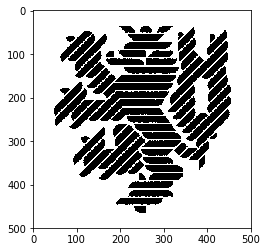

In [44]:
# Solution:

data = np.loadtxt("bitmap_data.csv", delimiter=',')
#print(data)



data[data<150] = 0
data[data>=150] = 1

plt.imshow(data, cmap='binary_r')
plt.show()

#print(data.shape)



### Data manipulation using NumPy routines

#### Generate the derivation of a given set of data
The NumPy routine 
```
np.gradient(y)
```
generates the derivation of a given function (data).

#### Smoothing via Moving-Average
Moving average is a simple operation used usually to suppress noise of a signal: we set the value of each point to the average of the values in its neighborhood. With NumPy this is done using the 
```python
np.convolve(y, np.ones((N,))/N), mode="same")
```
routine.  
The derivation and mathematics of this routine is described under the following link:  
http://matlabtricks.com/post-11/moving-average-by-convolution

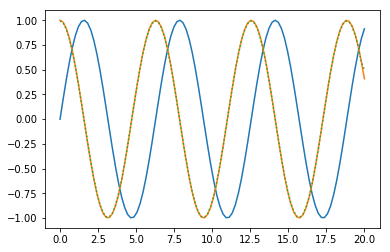

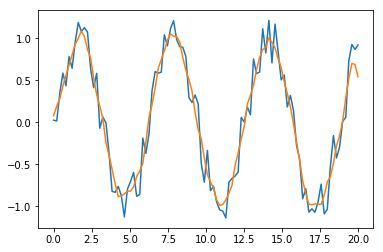

In [55]:
# Example Derivation
import random

x = np.linspace(0,20,100) # Generate an array with 100 elements from 0 to 20
y = np.sin(x) # Calculate f(x) = sin(x)
y2 = np.cos(x) # Calculate f2(x) = cos(x)

dy = np.gradient(y,x) # Generate the derivation 

plt.plot(x,y) # f(x) 
plt.plot(x,y2) # f2(x)
plt.plot(x,dy,':') # df(x) which should be the same as f2(x)
plt.show()

# Example Smoothing

# Add noise to sin(x) using random numbers between -0.3 and 0.3
y_noise = y
for i in range(0,len(y_noise)):
    y_noise[i] = y_noise[i] + random.uniform(-0.3,0.3)
    
    
sm = np.convolve(y_noise, np.ones((5,))/5, mode='same') # Moving Average

plt.plot(x,y_noise)
plt.plot(x,sm)
plt.show()




#### Root finding
Root finding in combination with a derivative is one way to find the turning points of a function.
A root exists if the function value assumes the value 0 at any point. Since NumPy arrays do not have continuous values (there is always a step between two elements) it is possible that there is no exact 0 value. Therefore one has to check if there is a sign change between two elements. If a sign change occured the root is between those two elements.

### <font color="green"> _Task 2: RootFinding Algorithm_ </font>

1. Develop a function that implements the task described above.
   Proceed as follows:
    - The function should take two parameters x,y which are both two numpy arrays
    - Create an empty list in which the results will be stored
    - Loop through the y array and check if y[i] > 0 and y[i+1] < 0  or  y[i] < 0 and y[i+1] > 0
    - If the condition is true use x[i] and x[i+1] two interpolate the value inbetween
    - Return the result list

In [57]:
def root_finding(x,y):
    root_list = [] 
    for i in range(0,len(y)-1):
        if y[i] == 0:
            root_list.append(x[i])
        elif ((y[i] > 0 and y[i+1] < 0) or (y[i] < 0 and y[i+1] > 0)):
            mid = (x[i] + x[i+1])/2
            root_list.append(mid)
    return root_list

[0.0, 3.1313131313131315, 6.363636363636363, 9.393939393939394, 12.626262626262626, 15.656565656565657, 18.88888888888889]


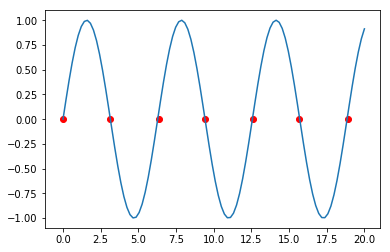

In [60]:
# Check if your function works:

x = np.linspace(0,20,100)
y = np.sin(x) 

roots = root_finding(x,y)
roots_y = np.zeros_like(roots)

print(roots)

plt.plot(x, y)
plt.scatter(roots, roots_y, color='red')


### <font color="green"> _Task 3: Data Analysis using NumPy_ </font>

1. Use NumPy's .loadtxt() routine to access the data stored in abstand.dat and store it in a numpy array
1. Plot column 0 against column 1 of the raw data
1. Define a mask to focus the data only on the first oszilations (e.g. t in [10 s, 25 s]) and mask out values larger than 50
1. Use NumPy's _.convolve_ routine to smooth the data
1. Find the turning points (minima/maxima) of the masked data. Therefore compute the derivative in combination with the root_finding algorithm.
1. Finally try to create the following plot:
<br>
<br>
<img src="images/final_plot.png" style="width:450px;"/>

In [ ]:
# Solution: